<a href="https://colab.research.google.com/github/Zahorulko-O/DS/blob/main/test_task_intel_zahorulko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test 

In [1]:
#!pip install eli5
#!pip install catboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import eli5
from eli5 import formatters
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report
import lightgbm as lgb
import catboost as cb
from sklearn import metrics


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
#conect with google disk
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#read data
train = pd.read_csv('/content/drive/MyDrive/test/train_dataset.csv', index_col='UserID')
test = pd.read_csv('/content/drive/MyDrive/test/test_dataset.csv', index_col='UserID')
train

,Gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,TotalGrade
UserID,,,,,,,,,,,,,,,,,
346,F,Jordan,Jordan,lowerlevel,G-02,B,French,S,NaN,24.0,97,15,14,No,Good,Under-7,H
150,M,SaudiArabia,SaudiArabia,HighSchool,G-11,A,Quran,S,Father,NaN,80,51,59,Yes,Good,Under-7,H
314,F,Jordan,lebanon,lowerlevel,G-04,B,Science,F,Mum,78.0,88,74,83,Yes,Good,Under-7,H
306,M,Jordan,Jordan,lowerlevel,G-04,B,Science,F,NaN,65.0,59,74,83,Yes,Good,Under-7,H
191,M,KW,KuwaIT,MiddleSchool,G-08,A,Arabic,S,Father,15.0,25,37,13,Yes,Good,Above-7,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,M,KW,KuwaIT,MiddleSchool,G-07,A,Quran,S,Father,NaN,80,15,70,Yes,Good,Under-7,H
357,M,Jordan,Jordan,lowerlevel,G-02,B,French,S,Father,NaN,87,21,27,Yes,Good,Under-7,M
148,F,Jordan,Jordan,MiddleSchool,G-07,A,Quran,S,Father,60.0,55,30,40,No,Bad,Under-7,M


### Look at data:

In [5]:
test.shape, train.shape

((96, 16), (384, 17))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 346 to 307
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    384 non-null    object 
 1   NationalITy               384 non-null    object 
 2   PlaceofBirth              384 non-null    object 
 3   StageID                   384 non-null    object 
 4   GradeID                   384 non-null    object 
 5   SectionID                 384 non-null    object 
 6   Topic                     384 non-null    object 
 7   Semester                  384 non-null    object 
 8   Relation                  264 non-null    object 
 9   raisedhands               297 non-null    float64
 10  VisITedResources          384 non-null    int64  
 11  AnnouncementsView         384 non-null    int64  
 12  Discussion                384 non-null    int64  
 13  ParentAnsweringSurvey     384 non-null    object 
 14  Parentsc

In [7]:
train.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,297.000000,384.000000,384.000000,384.000000
mean,47.363636,55.734375,38.117188,43.250000
std,30.775052,32.860609,26.482258,27.341473
min,0.000000,0.000000,0.000000,1.000000
25%,17.000000,20.000000,14.000000,20.000000
50%,50.000000,69.000000,33.500000,39.000000
75%,75.000000,85.250000,58.000000,70.000000
max,100.000000,99.000000,98.000000,98.000000


(<matplotlib.axes._subplots.AxesSubplot at 0x7fec3f39c310>,)

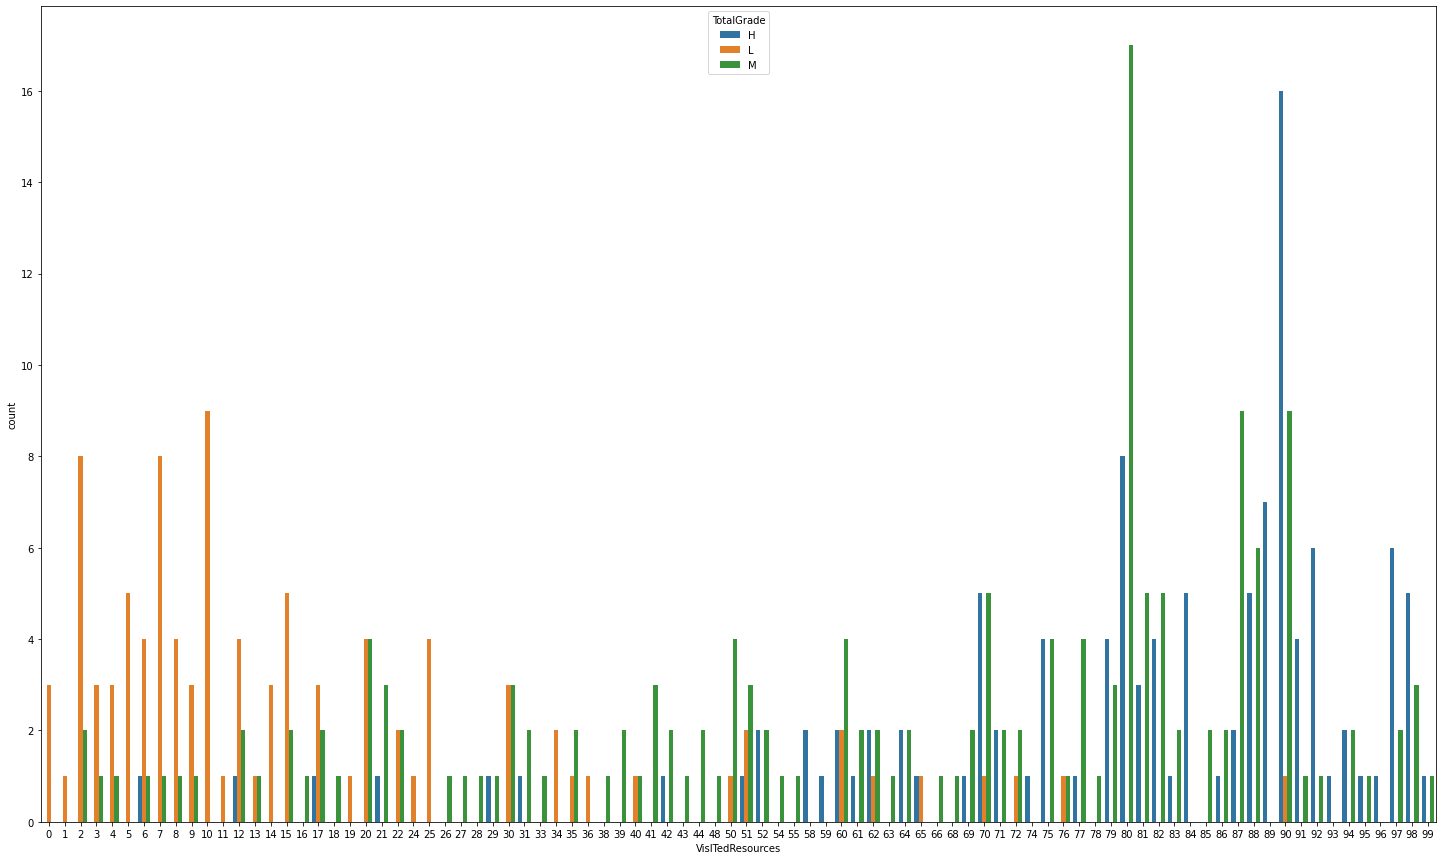

In [8]:
#11- Visited resources- how many times the student visits a course content(numeric:0-100)
ax, fig = plt.subplots(figsize=(25,15))
sns.countplot(x='VisITedResources', hue='TotalGrade', data=train),


TotalGrade on VisITedResources:
 L - first times(from 0 to 90, max=10), H - last times(from 6 to 99, max=90), M - ast times(from 6 to 99, max=80)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fec3e9d8f90>,)

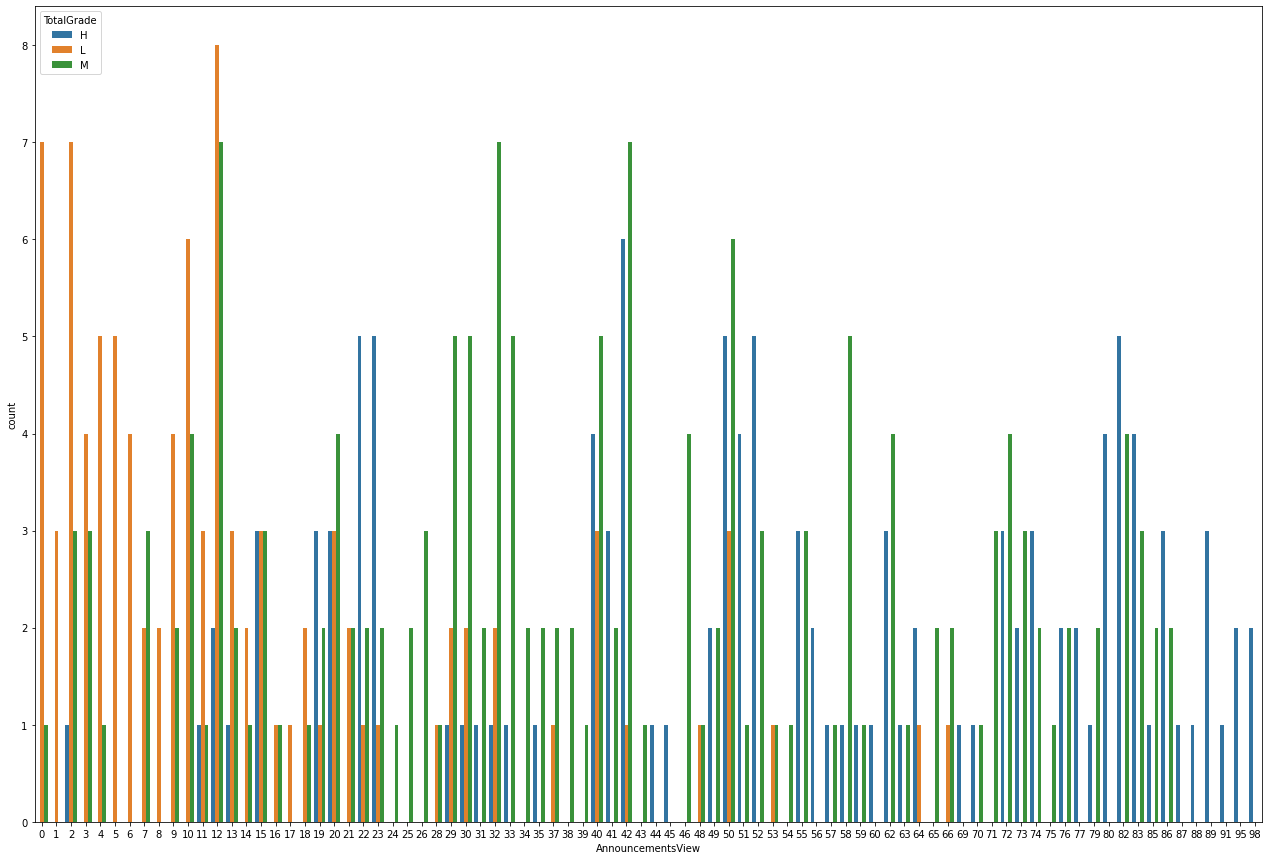

In [9]:
#12 Viewing announcements-how many times the student checks the new announcements(numeric:0-100)
ax, fig = plt.subplots(figsize=(22,15))
sns.countplot(x='AnnouncementsView', hue='TotalGrade', data=train),

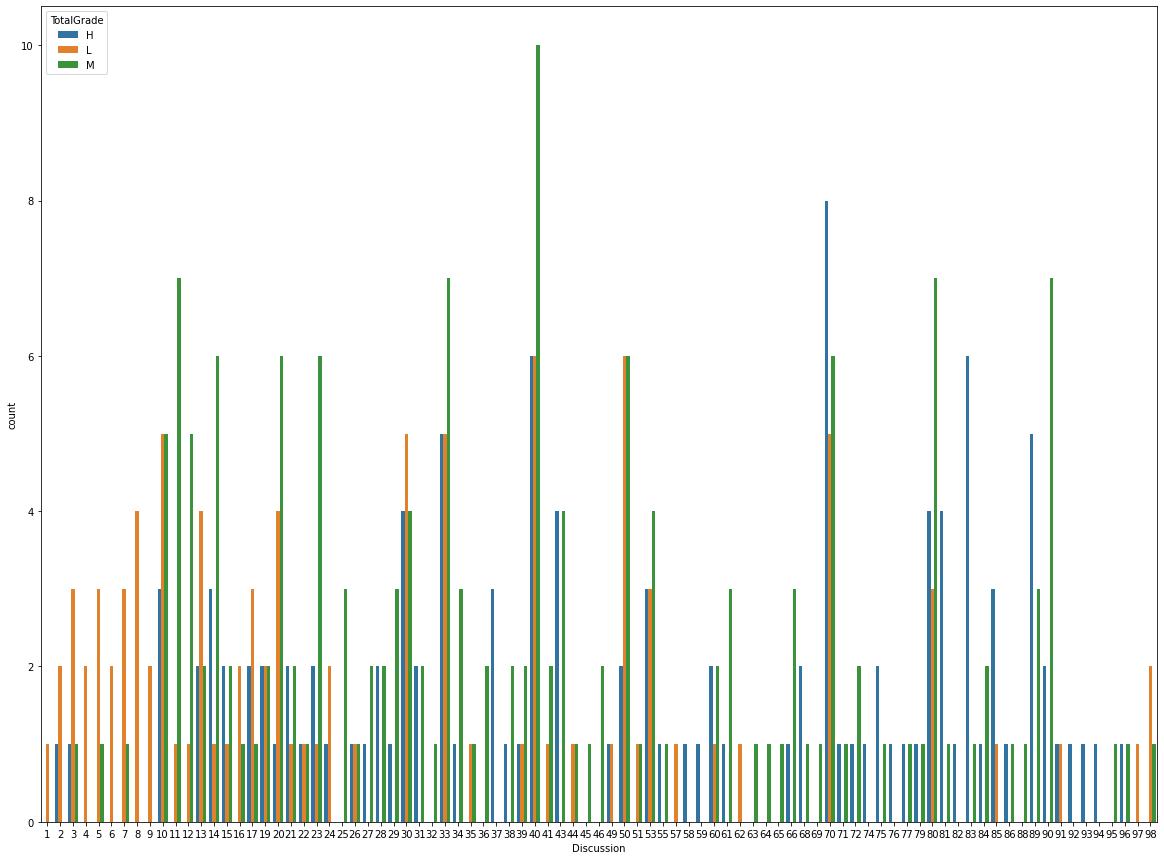

In [10]:
#13 Discussion groups- how many times the student participate on discussion groups (numeric:0-100)
ax, fig = plt.subplots(figsize=(20,15))
sns.countplot(x='Discussion', hue='TotalGrade', data=train)

In [11]:
train.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,297.000000,384.000000,384.000000,384.000000
mean,47.363636,55.734375,38.117188,43.250000
std,30.775052,32.860609,26.482258,27.341473
min,0.000000,0.000000,0.000000,1.000000
25%,17.000000,20.000000,14.000000,20.000000
50%,50.000000,69.000000,33.500000,39.000000
75%,75.000000,85.250000,58.000000,70.000000
max,100.000000,99.000000,98.000000,98.000000


In [12]:
test.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,75.000000,96.000000,96.000000,96.000000
mean,46.573333,51.052083,37.125000,43.416667
std,31.921429,33.858644,27.247501,28.940108
min,1.000000,0.000000,0.000000,1.000000
25%,18.000000,13.750000,15.000000,19.000000
50%,50.000000,57.500000,29.500000,39.500000
75%,73.500000,82.000000,59.000000,70.000000
max,100.000000,98.000000,95.000000,99.000000


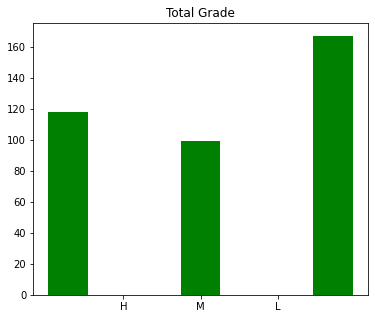

In [13]:
ax, fig = plt.subplots(figsize=(6,5))
plt.hist(train.TotalGrade, bins=7,rwidth=0.9,color='g')
plt.xticks(ticks=[i - 0.5 for i in np.linspace(1,2,3)], labels=['H','M','L'])
plt.title('Total Grade')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


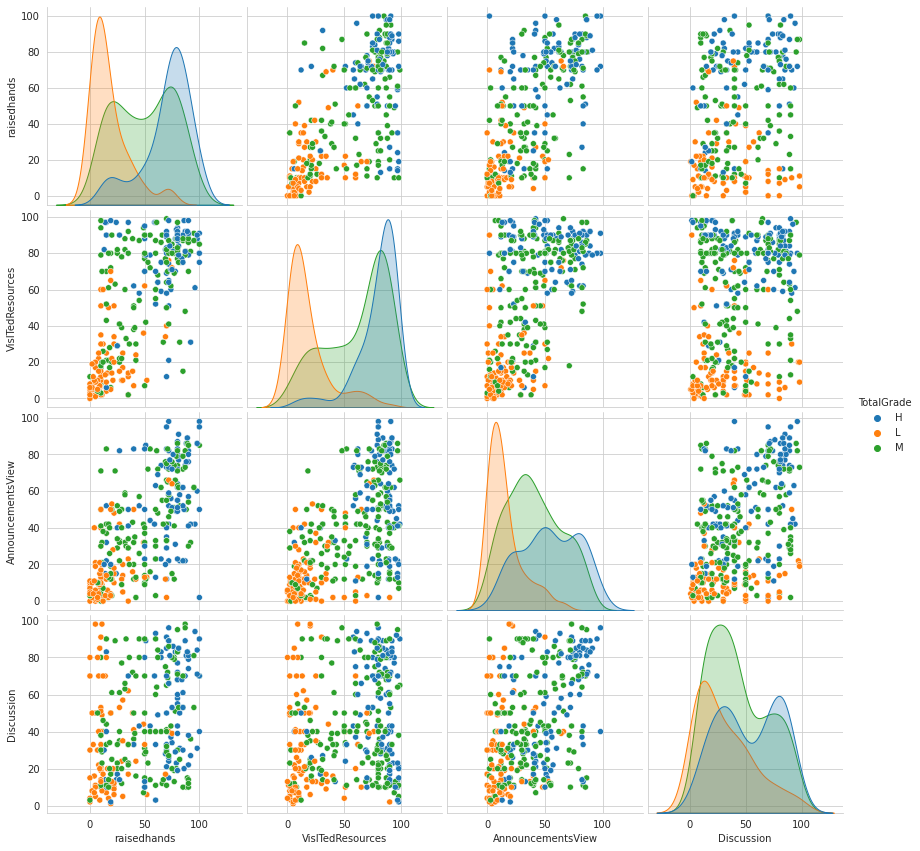

In [14]:
sns.set_style("whitegrid");
sns.pairplot(train, hue='TotalGrade', size=3);
plt.show()

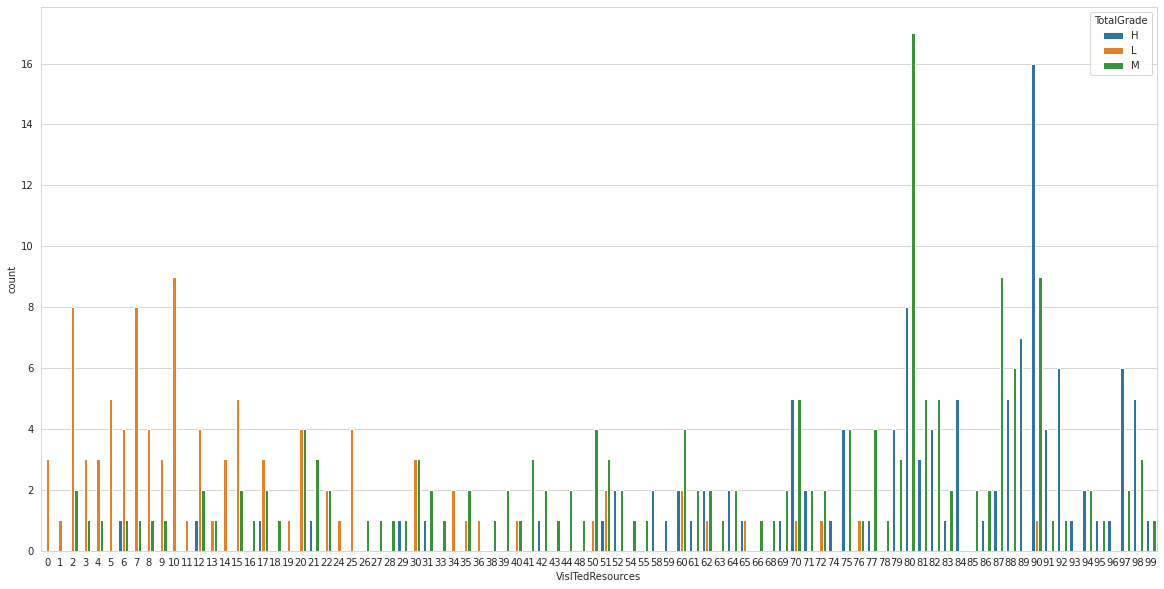

In [15]:
ax, fig = plt.subplots(figsize=(20,10))
sns.countplot(x='VisITedResources', hue='TotalGrade', data=train)

### Data clearing

In [16]:
#drop aswer in train
#y = le.fit_transform(train['TotalGrade'])
y = train['TotalGrade'].map({'H':0 ,'M':1, 'L':2})
train.drop(['TotalGrade'],inplace = True, axis = 1)

# Select numerical, columns
numerical_cols = [cname for cname in train.columns if train[cname].dtype not in ['object']]
categorial_cols = [cname for cname in train.columns if train[cname].dtype in ['object']]
print("numerical cols: ", numerical_cols, "\n")
print("categorial_cols cols: ", categorial_cols)

#clean
def fill_transform_LabelEncoder(data):
     

    data['GradeID']=data['GradeID'].apply(lambda x: int(x.split('-')[1]))
    data.fillna(0, inplace = True)    
    
    for i in categorial_cols:
        data["{}".format(i)] = LabelEncoder().fit_transform(data["{}".format(i)].astype(str))

  #  for i in categorial_cols:
  #      data["{}".format(i)] = pd.get_dummies(data[i], drop_first=True)
 
    return data

train_Label = fill_transform_LabelEncoder(train)
test_Label = fill_transform_LabelEncoder(test)




numerical cols:  ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'] 

categorial_cols cols:  ['Gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']


In [17]:
y.shape

(384,)

In [18]:
train_Label

,Gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
UserID,,,,,,,,,,,,,,,,
346,0,3,3,2,3,1,4,1,0,24.0,97,15,14,0,1,2
150,1,8,8,0,1,0,9,1,1,0.0,80,51,59,1,1,2
314,0,3,12,2,4,1,10,0,2,78.0,88,74,83,1,1,2
306,1,3,3,2,4,1,10,0,0,65.0,59,74,83,1,1,2
191,1,4,4,1,8,0,0,1,1,15.0,25,37,13,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,1,4,4,1,7,0,9,1,1,0.0,80,15,70,1,1,2
357,1,3,3,2,3,1,4,1,1,0.0,87,21,27,1,1,2
148,0,3,3,1,7,0,9,1,1,60.0,55,30,40,0,0,2


In [19]:
def new_feature(t):
    
    t['VisITedRes_L'] = t['VisITedResources'].apply(lambda x: x<=25)
    t['Announc_L'] = t['AnnouncementsView'].apply(lambda x: x<25)       
    t['Asia'] = t['PlaceofBirth'].apply(lambda x: x in ['KuwaIT','Jordan', 'Iraq', 
                                                           'lebanon', 'SaudiArabia', 'Palestine','Iran', 'Syria'])   
    t['Africa'] = t['PlaceofBirth'].apply(lambda x: x in ['Morocco', 'Egypt', 'Tunis','Lybia'])
    t['America'] = t['PlaceofBirth'].apply(lambda x: x in ['USA', 'venzuela'])                                
    t['NationalITy_is_PlaceofBirth'] = train['NationalITy'] == train['PlaceofBirth']   
    t['betterinfirstsem'] = ((t['VisITedResources']> 50) & (t['Semester'] =='F'))
    t['SAD-VTR'] = ((t['StudentAbsenceDays']=='Under-7') & (t['VisITedResources']>50))
    # Group Discussion by client id and calculate mean, max, min of loans
    discussion_agg = t.groupby(t.index)['Discussion'].agg(['mean', 'max', 'min'])
    discussion_agg.columns = ['mean_Discussion', 'max_Discussion', 'min_Discussion']
    t.merge(discussion_agg, left_on = t.index, right_index=True, how = 'left')
    
    raisedhands_agg = t.groupby(t.index)['raisedhands'].agg(['mean', 'max', 'min'])
    raisedhands_agg.columns = ['mean_raisedhands', 'max_raisedhands', 'min_raisedhands']
    t.merge(raisedhands_agg, left_on = t.index, right_index=True, how = 'left')
        
    return t

new_train = new_feature(train_Label)
new_test = new_feature(test_Label)
new_train.tail()

,Gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,VisITedRes_L,Announc_L,Asia,Africa,America,NationalITy_is_PlaceofBirth,betterinfirstsem,SAD-VTR
UserID,,,,,,,,,,,,,,,,,,,,,,,,
134,1,4,4,1,7,0,9,1,1,0.0,80,15,70,1,1,2,False,True,False,False,False,True,False,False
357,1,3,3,2,3,1,4,1,1,0.0,87,21,27,1,1,2,False,True,False,False,False,True,False,False
148,0,3,3,1,7,0,9,1,1,60.0,55,30,40,0,0,2,False,False,False,False,False,True,False,False
324,1,9,9,2,3,0,4,0,0,0.0,35,18,31,0,0,2,False,True,False,False,False,True,False,False
307,1,3,3,2,4,1,10,1,2,72.0,64,59,89,1,1,2,False,False,False,False,False,True,False,False


### Create and train model


In [20]:
X_train, X_val, y_train, y_val = train_test_split(new_train.values, y, 
                                                                test_size=0.2, random_state=42)


In [21]:
def create_model(m):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    print(classification_report(y_val, y_pred))


In [22]:
print("XGBClassifier ", create_model(XGBClassifier()))
print("RandomForestClassifier ", create_model(RandomForestClassifier()))
print("LGBM ", create_model(lgb.LGBMClassifier()))

from sklearn.linear_model import LogisticRegression

print("LogisticRegression ", create_model(LogisticRegression()))
CatBoost_mod = create_model(cb.CatBoostClassifier())


              precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.76      0.76      0.76        29
           2       0.84      0.88      0.86        24

    accuracy                           0.82        77
   macro avg       0.82      0.82      0.82        77
weighted avg       0.82      0.82      0.82        77

XGBClassifier  None
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        24
           1       0.62      0.72      0.67        29
           2       0.83      0.79      0.81        24

    accuracy                           0.73        77
   macro avg       0.75      0.73      0.73        77
weighted avg       0.74      0.73      0.73        77

RandomForestClassifier  None
              precision    recall  f1-score   support

           0       0.84      0.67      0.74        24
           1       0.67      0.76      0.71        29
           2       0.84   

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


33:	learn: 0.5772324	total: 127ms	remaining: 3.59s
34:	learn: 0.5696722	total: 131ms	remaining: 3.6s
35:	learn: 0.5629249	total: 133ms	remaining: 3.56s
36:	learn: 0.5564335	total: 135ms	remaining: 3.51s
37:	learn: 0.5518577	total: 137ms	remaining: 3.47s
38:	learn: 0.5446663	total: 140ms	remaining: 3.44s
39:	learn: 0.5408395	total: 142ms	remaining: 3.41s
40:	learn: 0.5373385	total: 143ms	remaining: 3.34s
41:	learn: 0.5334881	total: 145ms	remaining: 3.31s
42:	learn: 0.5292791	total: 147ms	remaining: 3.28s
43:	learn: 0.5225662	total: 150ms	remaining: 3.26s
44:	learn: 0.5158269	total: 153ms	remaining: 3.24s
45:	learn: 0.5116452	total: 155ms	remaining: 3.22s
46:	learn: 0.5069357	total: 159ms	remaining: 3.23s
47:	learn: 0.5036638	total: 163ms	remaining: 3.23s
48:	learn: 0.4984117	total: 166ms	remaining: 3.22s
49:	learn: 0.4947935	total: 168ms	remaining: 3.19s
50:	learn: 0.4908433	total: 170ms	remaining: 3.17s
51:	learn: 0.4885733	total: 173ms	remaining: 3.15s
52:	learn: 0.4833345	total: 175m

CatBoostClassifier is beter model (but XGBClassifier  is good to)

> Абзац із відступом



### Get hyperparamethers

In [23]:
%%time
params = {'depth': [3, 5, 7, 9, 10],
          'learning_rate' : [0.03, 0.01, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300]}

cb_model = GridSearchCV(cb.CatBoostClassifier(), params, cv = 7)
cb_model.fit(X_train, y_train)
print( cb_model.best_score_)
print(cb_model.best_params_)

Показано результат, скорочений до останніх рядків (5000).
104:	learn: 0.9256810	total: 2.26s	remaining: 4.2s
105:	learn: 0.9244889	total: 2.27s	remaining: 4.16s
106:	learn: 0.9233566	total: 2.3s	remaining: 4.15s
107:	learn: 0.9202906	total: 2.3s	remaining: 4.09s
108:	learn: 0.9191580	total: 2.33s	remaining: 4.08s
109:	learn: 0.9178619	total: 2.35s	remaining: 4.06s
110:	learn: 0.9156119	total: 2.35s	remaining: 4.01s
111:	learn: 0.9144823	total: 2.38s	remaining: 3.99s
112:	learn: 0.9136247	total: 2.41s	remaining: 3.98s
113:	learn: 0.9128248	total: 2.43s	remaining: 3.97s
114:	learn: 0.9103365	total: 2.43s	remaining: 3.92s
115:	learn: 0.9093200	total: 2.47s	remaining: 3.91s
116:	learn: 0.9082739	total: 2.5s	remaining: 3.9s
117:	learn: 0.9073245	total: 2.52s	remaining: 3.89s
118:	learn: 0.9062989	total: 2.55s	remaining: 3.88s
119:	learn: 0.9051227	total: 2.56s	remaining: 3.84s
120:	learn: 0.9041552	total: 2.59s	remaining: 3.83s
121:	learn: 0.9033976	total: 2.62s	remaining: 3.82s
122:	learn:

In [25]:
#cb_model.best_params_, cb_model.get_feature_importance()
# summarize feature importance (drop )
cb.CatBoostClassifier(depth=5, 
                               iterations=300, 
                               l2_leaf_reg = 4, 
                               learning_rate = 0.1).fit(new_train, y).get_feature_importance()
#we need to del [24,23,21,20,19] columns

0:	learn: 1.0406567	total: 1.45ms	remaining: 434ms
1:	learn: 1.0053624	total: 3.04ms	remaining: 454ms
2:	learn: 0.9613016	total: 4.9ms	remaining: 485ms
3:	learn: 0.9239963	total: 6.7ms	remaining: 495ms
4:	learn: 0.8948414	total: 8.37ms	remaining: 494ms
5:	learn: 0.8654121	total: 11.4ms	remaining: 558ms
6:	learn: 0.8381754	total: 13.7ms	remaining: 575ms
7:	learn: 0.8128886	total: 15.5ms	remaining: 565ms
8:	learn: 0.7901937	total: 17.2ms	remaining: 558ms
9:	learn: 0.7705711	total: 21.7ms	remaining: 630ms
10:	learn: 0.7558795	total: 29.9ms	remaining: 786ms
11:	learn: 0.7379984	total: 34ms	remaining: 817ms
12:	learn: 0.7230139	total: 37.6ms	remaining: 829ms
13:	learn: 0.7085731	total: 40.4ms	remaining: 825ms
14:	learn: 0.6940595	total: 42ms	remaining: 799ms
15:	learn: 0.6804143	total: 43.7ms	remaining: 776ms
16:	learn: 0.6706435	total: 45.4ms	remaining: 756ms
17:	learn: 0.6592176	total: 47.1ms	remaining: 737ms
18:	learn: 0.6488735	total: 48.8ms	remaining: 722ms
19:	learn: 0.6383981	total: 

array([ 2.13547063,  3.00160756,  2.49138714,  1.78496435,  4.81491758,
        1.20042612,  6.33966759,  0.94281066,  5.22414768,  7.16109275,
       15.40911984, 10.3808201 ,  7.86968279,  4.66185859,  3.88618461,
       18.08020108,  2.70596113,  1.18861468,  0.        ,  0.        ,
        0.        ,  0.72106511,  0.        ,  0.        ])

In [26]:
new_train_x = new_train.drop(['betterinfirstsem','SAD-VTR', 'Asia',	'Africa',	'America'], axis = 1)
new_test_x = new_test.drop(['betterinfirstsem','SAD-VTR', 'Asia',	'Africa',	'America'], axis = 1)
new_train_x.shape, new_test_x.shape

((384, 19), (96, 19))

In [27]:
# fit the model on the whole dataset

final_mod = cb.CatBoostClassifier(depth=5, 
                               iterations=300, 
                               l2_leaf_reg = 4, 
                               learning_rate = 0.1)
final_mod.fit(new_train_x, y)
pred = final_mod.predict(new_test_x)

0:	learn: 1.0406567	total: 2.3ms	remaining: 688ms
1:	learn: 1.0053624	total: 4.57ms	remaining: 681ms
2:	learn: 0.9613016	total: 6.11ms	remaining: 605ms
3:	learn: 0.9239963	total: 7.55ms	remaining: 558ms
4:	learn: 0.8948414	total: 9.75ms	remaining: 575ms
5:	learn: 0.8654121	total: 11.4ms	remaining: 556ms
6:	learn: 0.8381754	total: 13.4ms	remaining: 562ms
7:	learn: 0.8128886	total: 15ms	remaining: 546ms
8:	learn: 0.7901937	total: 16.7ms	remaining: 540ms
9:	learn: 0.7705711	total: 18.2ms	remaining: 527ms
10:	learn: 0.7558795	total: 19.8ms	remaining: 519ms
11:	learn: 0.7379984	total: 21.2ms	remaining: 508ms
12:	learn: 0.7230139	total: 22.7ms	remaining: 502ms
13:	learn: 0.7085731	total: 24.2ms	remaining: 494ms
14:	learn: 0.6940595	total: 25.5ms	remaining: 485ms
15:	learn: 0.6804143	total: 26.9ms	remaining: 478ms
16:	learn: 0.6706435	total: 28.4ms	remaining: 473ms
17:	learn: 0.6592176	total: 29.9ms	remaining: 469ms
18:	learn: 0.6488735	total: 31.9ms	remaining: 472ms
19:	learn: 0.6383981	tota

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(final_mod, new_train_x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

print('Prediction: %d' % pred[0])

pred_df = pd.DataFrame(pred , index=test.index,
                       columns=['TotalGrade'])

pred_df['TotalGrade'] = pred_df['TotalGrade'].map({0:'H',1:'M', 2:'L'})
pred_df.to_csv('/content/drive/MyDrive/test/pred_zahorulko.csv', index_label='UserID')

Accuracy: 0.747 (0.071)
Prediction: 2


In [ ]:
pred_df